# Name : Fernando I.A.M.D.
# Index No.: 190172K

In [1]:
import cv2
import numpy as np
import sympy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline 

## Q1

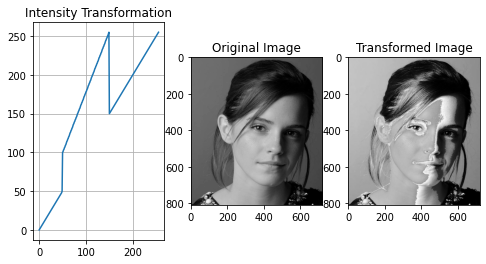

In [37]:
img = cv2.imread("emma_gray.jpg",cv2.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256
g = cv2.LUT(img,t)
g = cv2.cvtColor(g,cv2.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,3,figsize=(8,4))
ax[0].plot(t)
ax[0].grid(True)
ax[0].set_title("Intensity Transformation")

ax[1].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[1].set_title("Original Image")

ax[2].imshow(g)
ax[2].set_title("Transformed Image")
plt.show()

## Q2

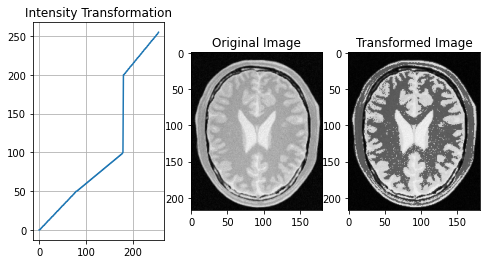

In [38]:
#######################  a  #######################
img = cv2.imread("brain_proton_density_slice.png",cv2.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,80)
t2 = np.linspace(50,100,100)
t3 = np.linspace(200,255,76)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256
g = cv2.LUT(img,t)
g = cv2.cvtColor(g,cv2.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,3,figsize=(8,4))
ax[0].plot(t)
ax[0].grid(True)
ax[0].set_title("Intensity Transformation")

ax[1].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[1].set_title("Original Image")

ax[2].imshow(g)
ax[2].set_title("Transformed Image")
plt.show()

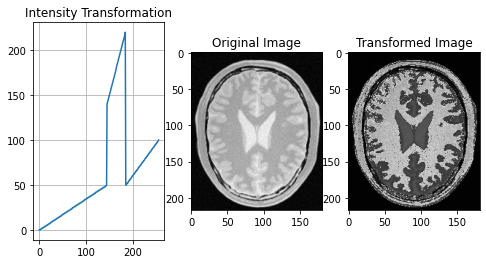

In [48]:
#######################  b  #######################
img = cv2.imread("brain_proton_density_slice.png",cv2.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,145)
t2 = np.linspace(140,220,40)
t3 = np.linspace(50,100,71)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256
g = cv2.LUT(img,t)
g = cv2.cvtColor(g,cv2.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,3,figsize=(8,4))
ax[0].plot(t)
ax[0].grid(True)
ax[0].set_title("Intensity Transformation")

ax[1].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[1].set_title("Original Image")

ax[2].imshow(g)
ax[2].set_title("Transformed Image")
plt.show()

## Q3

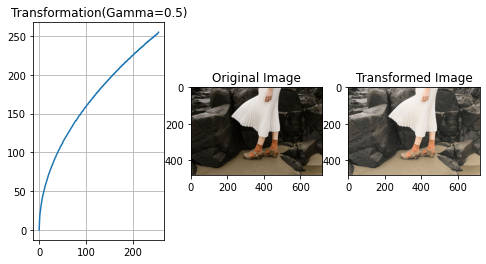

In [43]:
#######################  a  #######################
img = cv2.imread("highlights_and_shadows.jpg")
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_Lab = cv2.cvtColor(img,cv2.COLOR_BGR2Lab)
L,a,b = cv2.split(img_Lab)

gamma = 0.5
t = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype("uint8")
transformed_L = cv2.LUT(L,t)

img_L_Increased = cv2.merge([transformed_L,a,b])
img_L_Increased = cv2.cvtColor(img_L_Increased,cv2.COLOR_Lab2RGB)

fig,ax = plt.subplots(1,3,figsize=(8,4))
ax[0].plot(t)
ax[0].grid(True)
ax[0].set_title("Transformation(Gamma=0.5)")

ax[1].imshow(img_RGB)
ax[1].set_title("Original Image")

ax[2].imshow(img_L_Increased)
ax[2].set_title("Transformed Image")
plt.show()

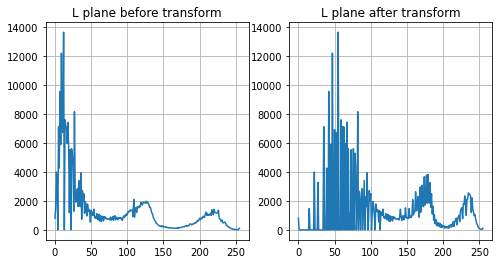

In [47]:
#######################  b  #######################
hist_f = cv2.calcHist([L],[0],None,[256],[0,256])
hist_g = cv2.calcHist([transformed_L],[0],None,[256],[0,256])

fig, ax  = plt.subplots(1,2,figsize = (8,4))
ax[0].plot(hist_f)
ax[0].grid(True)
ax[0].set_title("L plane before transform")
ax[1].plot(hist_g)
ax[1].grid(True)
ax[1].set_title("L plane after transform")
plt.show()

## Q4

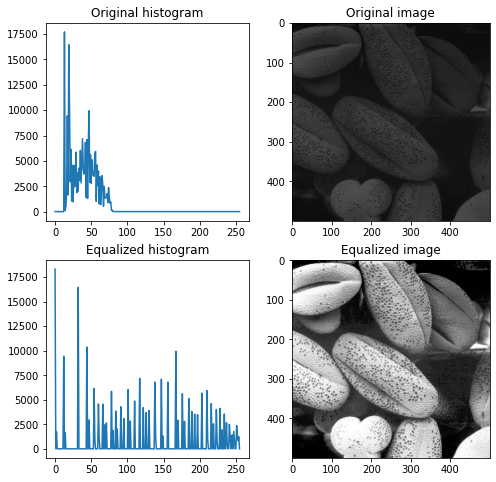

In [71]:
def hist_eq(img):
    histOrig, bins = np.histogram(img.flatten(), 256, [0, 255])
    cdf = histOrig.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0)
    imgEq = cdf[img.astype('uint8')]
    histEq, bins2 = np.histogram(imgEq.flatten(), 256, [0, 256])
    return imgEq, histOrig, histEq

img1 = cv2.imread("shells.png",cv2.IMREAD_GRAYSCALE)
g,hist_f,hist_g = hist_eq(img1)

fig, ax  = plt.subplots(2,2,figsize = (8,8))
ax[0][0].plot(hist_f)
ax[0][0].set_title("Original histogram")
ax[0][1].imshow(img1,cmap="gray",vmin=0,vmax=255)
ax[0][1].set_title("Original image")

ax[1][0].plot(hist_g)
ax[1][0].set_title("Equalized histogram")
ax[1][1].imshow(g,cmap="gray",vmin=0,vmax=255)
ax[1][1].set_title("Equalized image")
plt.show()

## Q5

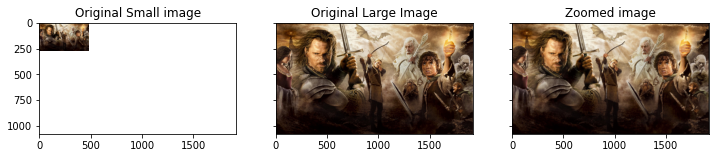

In [11]:
#################### a - nearest-neighbor ####################
def zoom(img,scale):       
    rows = int(scale*img.shape[0])
    cols = int(scale*img.shape[1])
    zoomed = np.zeros((rows,cols,3),dtype=img.dtype)
    gap = scale
    if scale<1:
        gap = 1
    for i in range(0,rows-gap):
        for j in range(0,cols-gap):
            for k in range(0,3):
                zoomed[i,j,k] = img[int(round(i/scale)),int(round(j/scale)),k]
    zoomed_RGB = cv2.cvtColor(zoomed,cv2.COLOR_BGR2RGB)
    return zoomed_RGB

img = cv2.imread("a1q5images\im01small.png")
img_large = cv2.imread("a1q5images\im01.png")
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_large_RGB = cv2.cvtColor(img_large,cv2.COLOR_BGR2RGB)
img_zoomed = zoom(img,4)

fig,ax = plt.subplots(1,3,figsize=(12,8),sharey=True,sharex=True)
ax[0].imshow(img_RGB)
ax[0].set_title("Original Small image")

ax[1].imshow(img_large_RGB)
ax[1].set_title("Original Large Image")

ax[2].imshow(img_zoomed)
ax[2].set_title("Zoomed image")
plt.show()

SSD= 1609982256


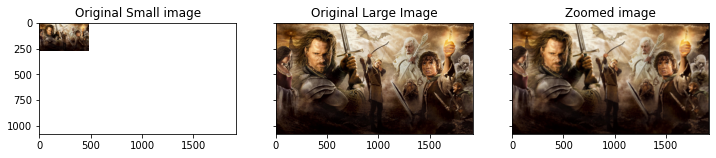

In [17]:
#################### b - bilinear interpolation ####################
import math
def zoom(img,scale,img_large):       
    rows = int(scale*img.shape[0])
    cols = int(scale*img.shape[1])
    zoomed = np.zeros((rows,cols,3),dtype=img.dtype)
    gap = scale
    if scale<1:
        gap = 1
    ssd = 0
    for i in range(0,rows-gap):
        for j in range(0,cols-gap):
            for k in range(0,3):
                x = i/scale - math.floor(i/scale)
                y = j/scale - math.floor(j/scale)
                tl = img[math.floor(i/scale),math.floor(j/scale),k]
                bl = img[math.floor(i/scale),math.ceil(j/scale),k]
                tr = img[math.ceil(i/scale),math.floor(j/scale),k]
                br = img[math.ceil(i/scale),math.ceil(j/scale),k]
                avg_pix = int((br*(1-x)+bl*(x))*(1-y)+(tr*(1-x)+tl*(x))*(y))
                zoomed[i,j,k] = avg_pix
                ssd += (avg_pix - img_large[i,j,k])**2
    zoomed_RGB = cv2.cvtColor(zoomed,cv2.COLOR_BGR2RGB)
    return zoomed_RGB,ssd

img = cv2.imread("a1q5images\im01small.png")
img_large = cv2.imread("a1q5images\im01.png")
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_large_RGB = cv2.cvtColor(img_large,cv2.COLOR_BGR2RGB)
img_zoomed,ssd = zoom(img,4,img_large)
print("SSD=",ssd)

fig,ax = plt.subplots(1,3,figsize=(12,8),sharey=True,sharex=True)
ax[0].imshow(img_RGB)
ax[0].set_title("Original Small image")

ax[1].imshow(img_large_RGB)
ax[1].set_title("Original Large Image")

ax[2].imshow(img_zoomed)
ax[2].set_title("Zoomed image")
plt.show()

## Q6

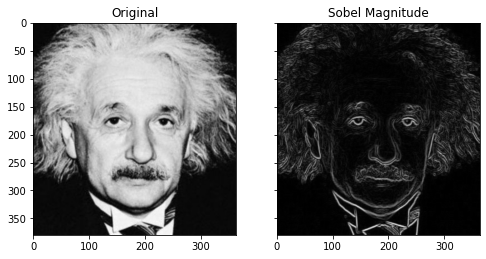

In [19]:
#######################  a  #######################
img = cv2.imread("einstein.png",cv2.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

#sobel verical
kernelver = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype='float')
imgv = cv2.filter2D(img,-1,kernelver)
#sobel horizontal 
kernelhor = np.array([(-1,0,1),(0,0,0),(-2,0,2)],dtype='float')
imgh = cv2.filter2D(img,-1,kernelhor)
#sobel magnitude
mag = np.sqrt(imgv**2+imgh**2)

fig,axes = plt.subplots(1,2,sharex='all',sharey='all',figsize=(8,8))

axes[0].imshow(img,cmap = 'gray')
axes[0].set_title("Original")

axes[1].imshow(mag,cmap = 'gray')
axes[1].set_title("Sobel Magnitude")
plt.show()

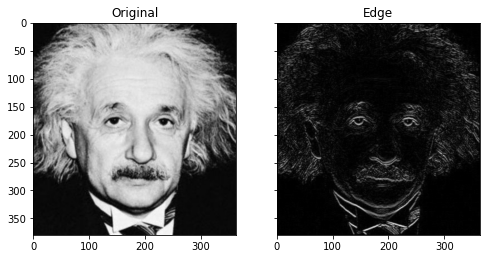

In [33]:
#######################  b  #######################
def kernalConv(img,kernal):   
    if kernal.shape[0]>1:
        gap = kernal.shape[0]-2
    else:
        gap = 0
    rows = img.shape[0]
    cols = img.shape[1]
    conv = np.zeros((rows,cols),dtype=img.dtype)
    for i in range(0+gap,rows-gap):
        for j in range(0+gap,cols-gap):
            sub = img[i-gap:i+gap+1,j-gap:j-gap+1]
            conv[i][j] = np.sum(np.multiply(sub,kernal))
    return conv
            
img = cv2.imread("einstein.png",cv2.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

#sobel verical
kernelver = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype='float')
#sobel horizontal 
kernelhor = np.array([(-1,0,1),(0,0,0),(-2,0,2)],dtype='float')

edgever = kernalConv(img,kernelver)
edgehor = kernalConv(img,kernelhor)
mag = np.sqrt(edgever**2+edgehor**2)
fig,axes = plt.subplots(1,2,sharex='all',sharey='all',figsize=(8,8))

axes[0].imshow(img,cmap = 'gray')
axes[0].set_title("Original")

axes[1].imshow(mag,cmap = 'gray')
axes[1].set_title("Edge")
plt.show()

In [ ]:
#######################  c  #######################

## 7

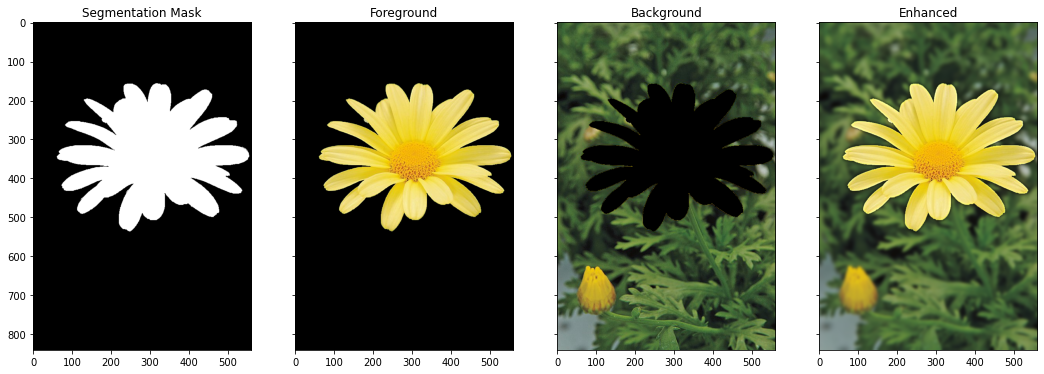

In [35]:
#######################  a,b  #######################
img = cv2.imread("daisy.jpg")
imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
mask = np.zeros(img.shape[:2],np.uint8)

bgModel = np.zeros([1,65],np.float64)
fgModel = np.zeros([1,65],np.float64)

rect = (50,150,520,400)

cv2.grabCut(img,mask,rect,bgModel,fgModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2) | (mask==0) , 0,1).astype('uint8')
mask3 = np.where((mask==1)|(mask==3),0,1).astype('uint8')

imgcut = img * mask2[:,:,np.newaxis]
imgback = img * mask3[:,:,np.newaxis]
imgcutRGB = cv2.cvtColor(imgcut,cv2.COLOR_BGR2RGB)
imgbackRGB = cv2.cvtColor(imgback,cv2.COLOR_BGR2RGB)

imgbackBlur = cv2.GaussianBlur(imgback,(21,21),0)
imgenhanced = cv2.add(imgcut ,imgbackBlur)
imgenhancedRGB = cv2.cvtColor(imgenhanced,cv2.COLOR_BGR2RGB)

fig,axes = plt.subplots(1,4,sharex='all',sharey='all',figsize=(18,18))

axes[0].imshow(mask2,cmap="gray")
axes[0].set_title("Segmentation Mask")

axes[1].imshow(imgcutRGB)
axes[1].set_title("Foreground")

axes[2].imshow(imgbackRGB)
axes[2].set_title("Background")

axes[3].imshow(imgenhancedRGB)
axes[3].set_title("Enhanced")
plt.show()

#######################  c  #######################
